# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, 24.01.2023

### Author: Semen Koveshnikov

**(1) Give one example of each of the following type of data.**

Answer:

(a) Analog: current value in 4-20 mA current-loop from a sensor (e.g soil moisture sensor).
	
(b) Digital: value of 4-20 mA loop in PLC program.

(c) Primary: voltmeter or amperemeter measurement value.

(d) Secondary (i.e., lack of data that is informative): 0A value at generation side means that generators are stopped.

(e) Metadata: timetag of energy consumption value in smart meter.

(f) Environmental: lower frequency than nominal one in the grid means lack of electricity production.

**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**

Answer:

There are instantaneous values of voltage (U), current (I) and apparent power (S) given on SCADA screen.
- (a) This is an information for an operator, when all values are labled, e.g.

S 1234 MVA

I 371 A

U 10.5 kV

- (b) Imagine if we have ideal system with only resistive load. Then S becomes redundant, because can be calculated as S=3UI and actually is active power (P).
- (c) If an engineer forgot to include units and lables, the figures are just numbers for an operator with no meaning, e.g.

1234

371

10.5


**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). What measuring station was used? Compare the solar radiation in those 3 days and provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

Helsinki Kumpula meteostation is the source of measurements data.

In [23]:
#libs import
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [24]:
#csv import + plots
solar_20220308=pd.read_csv('solar-20220308.csv', decimal=b'.', sep=',', usecols=[0,1,2,3,5],
parse_dates=[[0,1,3,2]],index_col=0)
solar_20220308.index.names=['Time']
solar_20220308.head()
# solar_20220308.info()

,Direct solar radiation (W/m2)
Time,
2022-03-08 00:00:00,-0.1
2022-03-08 00:01:00,-0.1
2022-03-08 00:02:00,0.1
2022-03-08 00:03:00,-0.1
2022-03-08 00:04:00,0.0


[Text(0.5, 1.0, 'Direct solar radiation (W/$m^{2}$), Helsinki Kumpula, 8 March 2022'),
 Text(0, 0.5, 'Direct solar radiation (W/$m^{2}$)'),
 Text(0.5, 0, 'Time')]

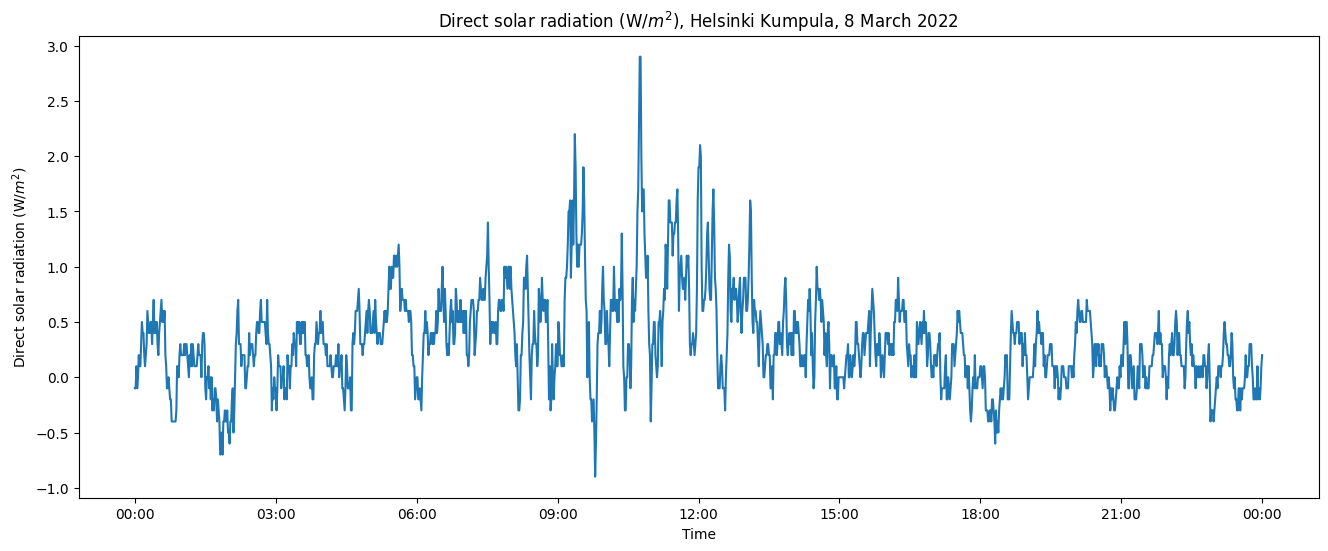

In [39]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(solar_20220308)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set(title='Direct solar radiation (W/$m^{2}$), Helsinki Kumpula, 8 March 2022',
ylabel='Direct solar radiation (W/$m^{2}$)', xlabel='Time')

In [25]:
solar_20220714=pd.read_csv('solar-20220714.csv', decimal=b'.', sep=',', usecols=[0,1,2,3,5],
parse_dates=[[0,1,3,2]],index_col=0)
solar_20220714.index.names=['Time']
solar_20220714.head()
# solar_20220714.info()

,Direct solar radiation (W/m2)
Time,
2022-07-14 00:00:00,-3.9
2022-07-14 00:01:00,-3.9
2022-07-14 00:02:00,-3.6
2022-07-14 00:03:00,-3.4
2022-07-14 00:04:00,-2.7


[Text(0.5, 1.0, 'Direct solar radiation (W/$m^{2}$), Helsinki Kumpula, 14 July 2022'),
 Text(0, 0.5, 'Direct solar radiation (W/$m^{2}$)'),
 Text(0.5, 0, 'Time')]

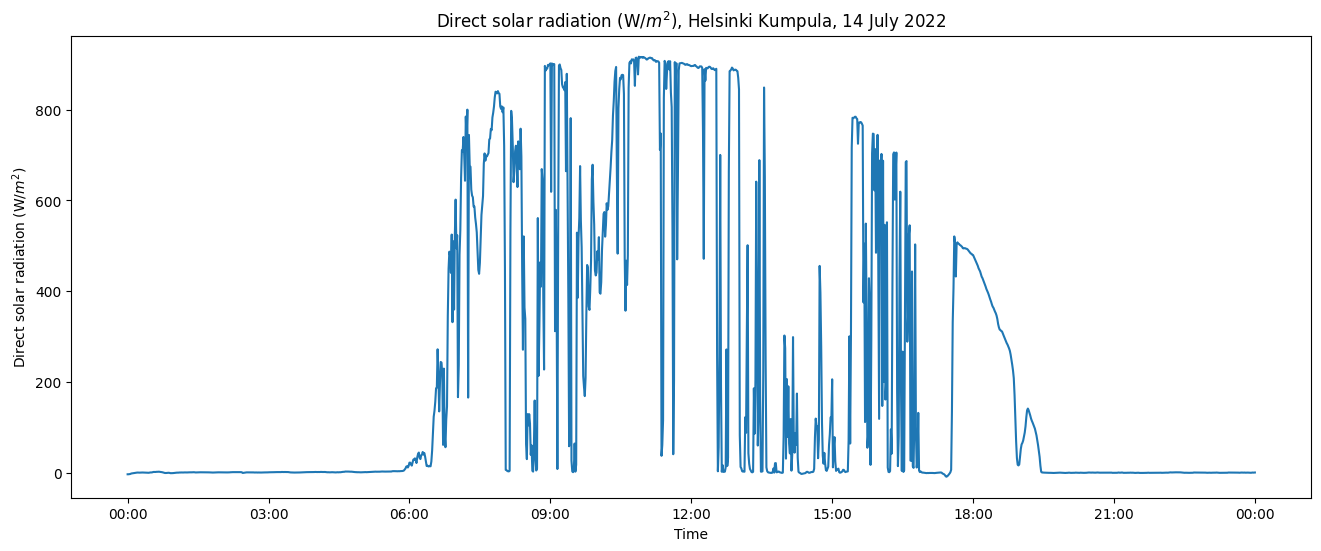

In [40]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(solar_20220714)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set(title='Direct solar radiation (W/$m^{2}$), Helsinki Kumpula, 14 July 2022',
ylabel='Direct solar radiation (W/$m^{2}$)', xlabel='Time')

In [58]:
solar_20221211=pd.read_csv('solar-20221211.csv', decimal=b'.', sep=',', usecols=[0,1,2,3,5],
parse_dates=[[0,1,3,2]],index_col=0)
solar_20221211.index.names=['Time']
solar_20221211.head()
# solar_20221211.info()

,Direct solar radiation (W/m2)
Time,
2022-12-11 00:00:00,-0.1
2022-12-11 00:01:00,-0.1
2022-12-11 00:02:00,0.0
2022-12-11 00:03:00,-0.1
2022-12-11 00:04:00,-0.1


[Text(0.5, 1.0, 'Direct solar radiation (W/$m^{2}$), Helsinki Kumpula, 11 December 2022'),
 Text(0, 0.5, 'Direct solar radiation (W/$m^{2}$)'),
 Text(0.5, 0, 'Time')]

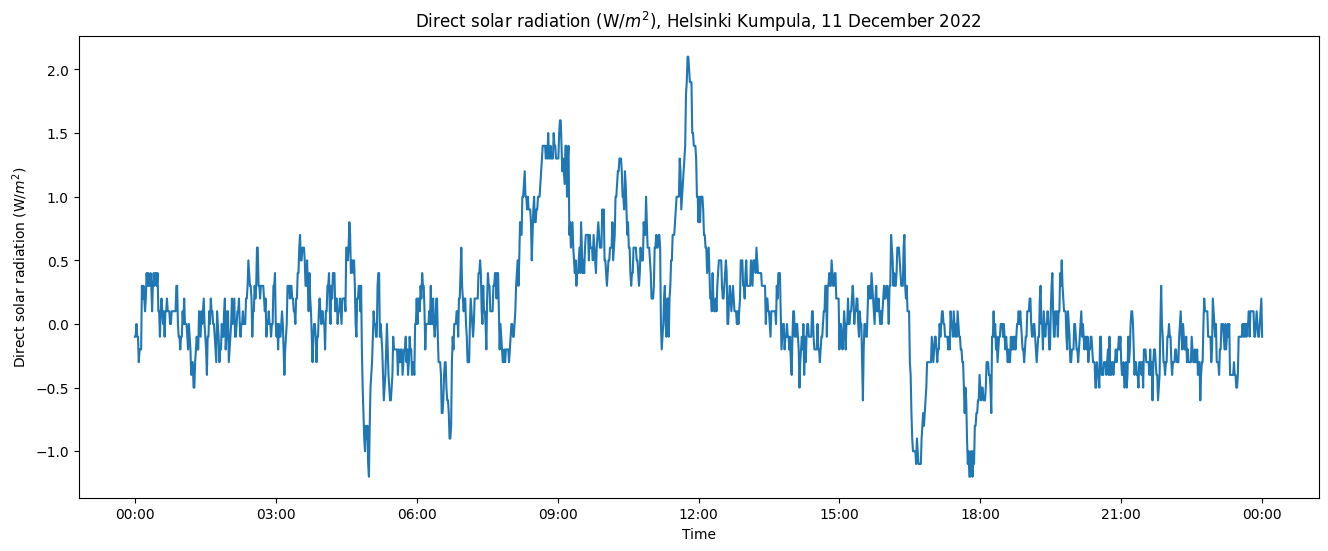

In [41]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(solar_20221211)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set(title='Direct solar radiation (W/$m^{2}$), Helsinki Kumpula, 11 December 2022',
ylabel='Direct solar radiation (W/$m^{2}$)', xlabel='Time')

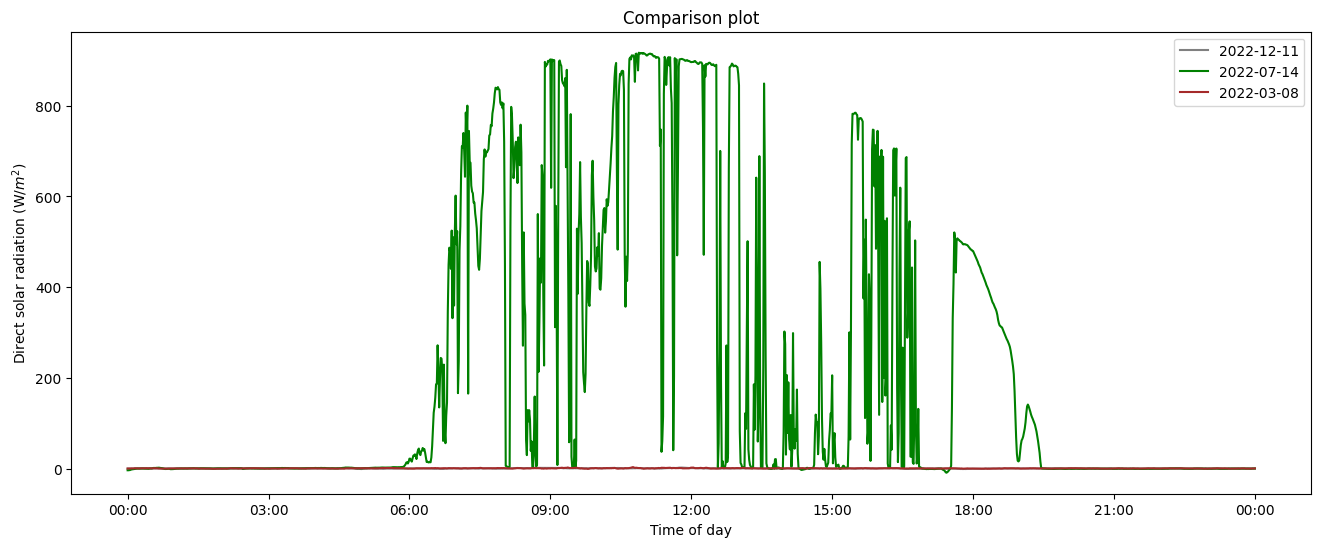

In [56]:
#comparison plot
delta1 = solar_20221211.index[0].date() - solar_20220308.index[0].date()
delta2 = solar_20221211.index[0].date() - solar_20220714.index[0].date()
fig, ax =plt.subplots(figsize=(16,6))
plt.plot(solar_20221211, color='grey')
plt.plot(solar_20220714.index+pd.offsets.Day(delta2.days),solar_20220714.values,color='green')
plt.plot(solar_20220308.index+pd.offsets.Day(delta1.days),solar_20220308.values,color='brown')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set(title='Comparison plot',xlabel='Time of day',ylabel='Direct solar radiation (W/$m^{2}$)')
plt.legend(['2022-12-11','2022-07-14','2022-03-08'])

Judging by the the plot above, in March and December, the solar electricity production is extremely low, and is neglegible in comparison to summer months, here, July.

**(4) Read the text [What Does the Metaverse Mean for the Future of Energy Consumption?](https://earth.org/metaverse-energy-consumption/). Write a brief analysis of the text based on the relation between data, energy and level of processes. From the energy perspective, is it possible to maintain this kind of technologies? Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

Answer:

Data centres have been improving power usage efficiency (PUE) quite successfully in recent years. Yet, their electricty consumption is growing, as number of the centres is also increasing. Due to this, there is a question arising, if it is possible to sustain the energy consumption of the computing centres in the near future.

The challenge poses a forseen limit of efficiency for computational devices. Once its maximum achievable figure is reached, servers consumption will increase quickly with respect to data exchange rate, which is also to rise. It is a difficult task to predict the criticality of data centres in overall energy consumption of the future world. Some estimations claim the share of computing services to be 1% of total electricity consumption as of year 2018. [1] Hence, the low percent proposes lower level of attention to resolving the hurdle of energy consumption of these loads. There are many industrial processes that are not optimized enough yet and call for more scrutinity over their efficiency and improvement.

Overall, even though the demand of data centres is going to grow as number of the centres is to increase, the energy production will be able to withstand the consumption growth. In this, high level of automation and technological techniques used in data centre facilities will aid a lot.


[1]: [How Much Energy Do Data Centers Really Use? March 2020](https://energyinnovation.org/2020/03/17/how-much-energy-do-data-centers-really-use/#:~:text=The%20finding%20that%20global%20data%20centers%20likely%20consumed,energy%20use%20over%20the%20past%20decade%20%28Figure%202%29.)